# Building dataset inspection

## Introduction

In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from mrcnn import utils
from mrcnn import model as modellib
from mrcnn.model import log
from mrcnn.config import Config
from mrcnn import visualize

Using TensorFlow backend.


In [3]:
from tanzania_challenge import buildings

/home/rde/.virtualenvs/tanz/lib/python3.6/site-packages/tanzania_challenge-0.1-py3.6.egg/tanzania_challenge/buildings.py:99: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/home/rde/.virtualenvs/tanz/lib/python3.6/site-packages/tanzania_challenge-0.1-py3.6.egg/tanzania_challenge/buildings.py:99: SyntaxWarning: assertion is always true, perhaps remove parentheses?


In [4]:
from importlib import reload

## Configuration preparation

In [5]:
class BuildingsConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "buildings"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 3  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 384
    IMAGE_MAX_DIM = 384

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
config = BuildingsConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [6]:
DATAPATH = os.path.join("..", "data", "open_ai_tanzania", "preprocessed")
MODEL_DIR = os.path.join("..", "data", "open_ai_tanzania", "output", "instance_segmentation", "checkpoints")

In [7]:
os.listdir(os.path.join(DATAPATH, str(config.IMAGE_MIN_DIM)))

['grid_001', 'grid_022', 'testing', 'training', 'validation']

## Dataset displaying

In [8]:
reload(buildings)

/home/rde/.virtualenvs/tanz/lib/python3.6/site-packages/tanzania_challenge-0.1-py3.6.egg/tanzania_challenge/buildings.py:99: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/home/rde/.virtualenvs/tanz/lib/python3.6/site-packages/tanzania_challenge-0.1-py3.6.egg/tanzania_challenge/buildings.py:99: SyntaxWarning: assertion is always true, perhaps remove parentheses?


<module 'tanzania_challenge.buildings' from '/home/rde/.virtualenvs/tanz/lib/python3.6/site-packages/tanzania_challenge-0.1-py3.6.egg/tanzania_challenge/buildings.py'>

In [9]:
train_bd = buildings.BuildingDataset()
val_bd = buildings.BuildingDataset()
train_bd.load_buildings(DATAPATH, subset="training", img_size=config.IMAGE_MIN_DIM)
val_bd.load_buildings(DATAPATH, subset="validation", img_size=config.IMAGE_MIN_DIM)

In [10]:
print(len(train_bd.image_info))
train_bd.image_info[0]

8737


{'id': 0,
 'source': 'building',
 'path': '../data/open_ai_tanzania/preprocessed/384/training/images/grid_001_249_130_36864_34176.tif',
 'name': 'grid_001_249_130_36864_34176.tif',
 'raw_image_path': '../data/input/images/grid_001.tif',
 'feature_path': '../data/open_ai_tanzania/preprocessed/384/training/features/grid_001_249_130_36864_34176.json',
 'item_path': '../data/open_ai_tanzania/preprocessed/384/training/items/grid_001_249_130_36864_34176.json',
 'prediction_path': '../data/open_ai_tanzania/preprocessed/384/training/predicted_labels/grid_001_249_130_36864_34176.json',
 'width': 384,
 'height': 384}

In [16]:
mask, class_ids = train_bd.load_mask(1)

In [17]:
print(len(mask))
print(class_ids)

384
[3 2]


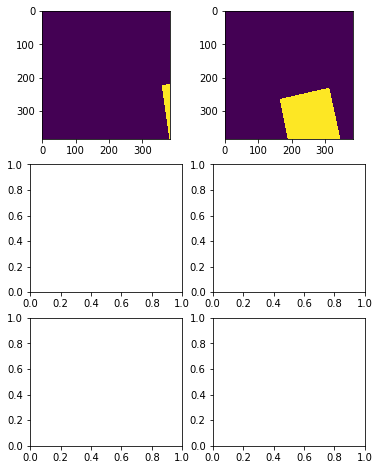

In [18]:
f, ax = plt.subplots(3, 2, figsize=(6, 8))
for i in range(class_ids.shape[0]):
    ax[int(i/2)][int(i%2)].imshow(mask[:, :, i])

In [19]:
print(len(val_bd.image_info))
val_bd.image_info[0]

5


{'id': 0,
 'source': 'building',
 'path': '../data/open_ai_tanzania/preprocessed/384/validation/images/grid_058_384_384_0_0.tif',
 'name': 'grid_058_384_384_0_0.tif',
 'raw_image_path': '../data/input/images/grid_058.tif',
 'feature_path': '../data/open_ai_tanzania/preprocessed/384/validation/features/grid_058_384_384_0_0.json',
 'item_path': '../data/open_ai_tanzania/preprocessed/384/validation/items/grid_058_384_384_0_0.json',
 'prediction_path': '../data/open_ai_tanzania/preprocessed/384/validation/predicted_labels/grid_058_384_384_0_0.json',
 'width': 384,
 'height': 384}

In [15]:
mask, class_ids = val_bd.load_mask(0)

In [16]:
class_ids

array([], dtype=uint8)

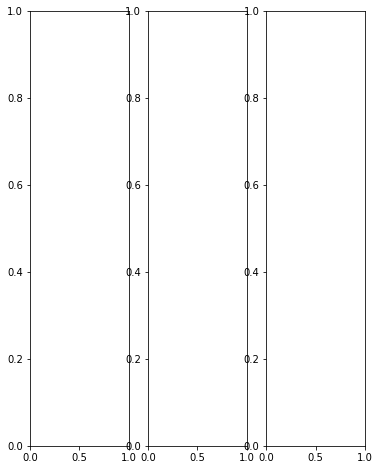

In [17]:
f, ax = plt.subplots(1, 3, figsize=(6, 8))
for i in range(class_ids.shape[0]):
    ax[int(i%3)].imshow(mask[:, :, i])

In [60]:
train_bd.prepare()
val_bd.prepare()

### Model training

In [21]:
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [22]:
model.load_weights("../../Mask_RCNN/mask_rcnn_coco.h5", by_name=True,
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                            "mrcnn_bbox", "mrcnn_mask"])

In [23]:
model.train(train_dataset=train_bd, val_dataset=val_bd, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: ../data/open_ai_tanzania/output/instance_segmentation/checkpoints/buildings20181109T1807/mask_rcnn_buildings_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_

/home/rde/.virtualenvs/tanz/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/rde/.virtualenvs/tanz/lib/python3.6/site-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/1
 99/100 [============================>.] - ETA: 5s - loss: 0.0831 - rpn_class_loss: 0.0000e+00 - rpn_bbox_loss: 0.0000e+00 - mrcnn_class_loss: 0.0831 - mrcnn_bbox_loss: 0.0000e+00 - mrcnn_mask_loss: 0.0000e+00 

/home/rde/.virtualenvs/tanz/lib/python3.6/site-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


100/100 [==============================] - 592s 6s/step - loss: 0.0823 - rpn_class_loss: 0.0000e+00 - rpn_bbox_loss: 0.0000e+00 - mrcnn_class_loss: 0.0823 - mrcnn_bbox_loss: 0.0000e+00 - mrcnn_mask_loss: 0.0000e+00 - val_loss: 1.5525e-06 - val_rpn_class_loss: 0.0000e+00 - val_rpn_bbox_loss: 0.0000e+00 - val_mrcnn_class_loss: 0.0000e+00 - val_mrcnn_bbox_loss: 0.0000e+00 - val_mrcnn_mask_loss: 0.0000e+00


In [19]:
train_gen = modellib.data_generator(train_bd, config)

In [19]:
val_gen = modellib.data_generator(val_bd, config)

In [20]:
next(train_gen)

([array([[[[ 57.3,  29.2,  12.1],
           [ 56.3,  28.2,  11.1],
           [ 52.3,  26.2,   8.1],
           ...,
           [ 15.3,  14.2, -18.9],
           [  9.3,   8.2, -24.9],
           [  7.3,   2.2, -26.9]],
  
          [[ 55.3,  27.2,  10.1],
           [ 52.3,  24.2,   7.1],
           [ 46.3,  18.2,   1.1],
           ...,
           [ 19.3,  18.2, -14.9],
           [ 15.3,  13.2, -16.9],
           [ 16.3,   9.2, -16.9]],
  
          [[ 56.3,  27.2,   8.1],
           [ 51.3,  23.2,   4.1],
           [ 43.3,  15.2,  -1.9],
           ...,
           [ 27.3,  22.2,  -6.9],
           [ 27.3,  22.2,  -4.9],
           [ 28.3,  21.2,  -4.9]],
  
          ...,
  
          [[ 54.3,  26.2,  11.1],
           [ 51.3,  23.2,   8.1],
           [ 51.3,  23.2,   8.1],
           ...,
           [ 63.3,  42.2,  31.1],
           [ 63.3,  42.2,  31.1],
           [ 63.3,  44.2,  30.1]],
  
          [[ 52.3,  22.2,   8.1],
           [ 51.3,  21.2,   7.1],
           [ 50.3,

In [25]:
modellib.load_image_gt(train_bd, config, 0)

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([  0, 384, 384,   3, 384, 384,   3,   0,   0, 384, 384,   1,   1,
          1,   1,   1]),
 array([], dtype=uint8),
 array([], shape=(0, 4), dt

In [26]:
    b = 0  # batch item index
    image_index = -1
    image_ids = np.copy(train_bd.image_ids)
    error_count = 0
    no_augmentation_sources = None or []


In [27]:
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES,
                                         config.RPN_ANCHOR_RATIOS,
                                         backbone_shapes,
                                         config.BACKBONE_STRIDES,
                                         config.RPN_ANCHOR_STRIDE)


In [28]:
            image_index = (image_index + 1) % len(image_ids)
            if True and image_index == 0:
                np.random.shuffle(image_ids)

            # Get GT bounding boxes and masks for image.
            image_id = image_ids[image_index]

In [29]:
augment  = False
no_augmentation_source = []
random_rois =  0
batch_size = 1

In [30]:
            if train_bd.image_info[image_id]['source'] in no_augmentation_source:
                image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
                modellib.load_image_gt(train_bd, config, image_id, augment=augment,
                              augmentation=None,
                              use_mini_mask=config.USE_MINI_MASK)
            else:
                image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
                    modellib.load_image_gt(train_bd, config, image_id, augment=augment,
                                augmentation=None,
                                use_mini_mask=config.USE_MINI_MASK)


In [31]:
np.any(gt_class_ids > 0)

False

In [32]:
not np.any(gt_class_ids > 0)


True

In [33]:
            if len(gt_boxes) > 0:
                rpn_match, rpn_bbox = build_rpn_targets(image.shape, anchors,
                                                        gt_class_ids, gt_boxes,
                                                        config)
            else:
                rpn_match = np.array([], dtype=np.int32)
                rpn_bbox = np.array([], dtype=np.int32)


In [34]:
            # Mask R-CNN Targets
            if random_rois:
                rpn_rois = generate_random_rois(
                    image.shape, random_rois, gt_class_ids, gt_boxes)
                if detection_targets:
                    rois, mrcnn_class_ids, mrcnn_bbox, mrcnn_mask =\
                        build_detection_targets(
                            rpn_rois, gt_class_ids, gt_boxes, gt_masks, config)


In [35]:
            # Init batch arrays
            if b == 0:
                batch_image_meta = np.zeros(
                    (batch_size,) + image_meta.shape, dtype=image_meta.dtype)
                batch_rpn_match = np.zeros(
                    [batch_size, anchors.shape[0], 1], dtype=rpn_match.dtype)
                batch_rpn_bbox = np.zeros(
                    [batch_size, config.RPN_TRAIN_ANCHORS_PER_IMAGE, 4], dtype=rpn_bbox.dtype)
                batch_images = np.zeros(
                    (batch_size,) + image.shape, dtype=np.float32)
                batch_gt_class_ids = np.zeros(
                    (batch_size, config.MAX_GT_INSTANCES), dtype=np.int32)
                batch_gt_boxes = np.zeros(
                    (batch_size, config.MAX_GT_INSTANCES, 4), dtype=np.int32)
                batch_gt_masks = np.zeros(
                    (batch_size, gt_masks.shape[0], gt_masks.shape[1],
                     config.MAX_GT_INSTANCES), dtype=gt_masks.dtype)
                if random_rois:
                    batch_rpn_rois = np.zeros(
                        (batch_size, rpn_rois.shape[0], 4), dtype=rpn_rois.dtype)
                    if detection_targets:
                        batch_rois = np.zeros(
                            (batch_size,) + rois.shape, dtype=rois.dtype)
                        batch_mrcnn_class_ids = np.zeros(
                            (batch_size,) + mrcnn_class_ids.shape, dtype=mrcnn_class_ids.dtype)
                        batch_mrcnn_bbox = np.zeros(
                            (batch_size,) + mrcnn_bbox.shape, dtype=mrcnn_bbox.dtype)
                        batch_mrcnn_mask = np.zeros(
                            (batch_size,) + mrcnn_mask.shape, dtype=mrcnn_mask.dtype)


In [37]:
rpn_match[:, np.newaxis]

array([], shape=(0, 1), dtype=int32)

## Display training image

In [17]:
train_bd = buildings.BuildingDataset()
train_bd.load_buildings(DATAPATH, subset="training", img_size=config.IMAGE_MIN_DIM)
train_bd.prepare()

In [201]:
print([ti["name"] for ti in train_bd.image_info])

['grid_001_249_130_36864_34176.tif', 'grid_001_249_384_36864_0.tif', 'grid_001_249_384_36864_10368.tif', 'grid_001_249_384_36864_10752.tif', 'grid_001_249_384_36864_11136.tif', 'grid_001_249_384_36864_1152.tif', 'grid_001_249_384_36864_11520.tif', 'grid_001_249_384_36864_11904.tif', 'grid_001_249_384_36864_12288.tif', 'grid_001_249_384_36864_12672.tif', 'grid_001_249_384_36864_13056.tif', 'grid_001_249_384_36864_13440.tif', 'grid_001_249_384_36864_13824.tif', 'grid_001_249_384_36864_14208.tif', 'grid_001_249_384_36864_14592.tif', 'grid_001_249_384_36864_14976.tif', 'grid_001_249_384_36864_1536.tif', 'grid_001_249_384_36864_15360.tif', 'grid_001_249_384_36864_15744.tif', 'grid_001_384_384_19200_19968.tif', 'grid_001_384_384_19200_20352.tif', 'grid_001_384_384_19200_20736.tif', 'grid_001_384_384_19200_21120.tif', 'grid_001_384_384_19200_21504.tif', 'grid_001_384_384_19200_21888.tif', 'grid_001_384_384_19200_22272.tif', 'grid_001_384_384_19200_22656.tif', 'grid_001_384_384_19200_2304.tif'

In [180]:
i = 25

In [181]:
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(train_bd, config, i, use_mini_mask=False)


In [182]:
info = train_bd.image_info[i]
print("image {} ID: {}.{} ({}) {}".format(info["name"], info["source"], info["id"], 0, 
                                       train_bd.image_reference(0)))

image grid_001_384_384_19200_22272.tif ID: building.25 (0) 0


In [183]:
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

Original image shape:  [384 384   3]


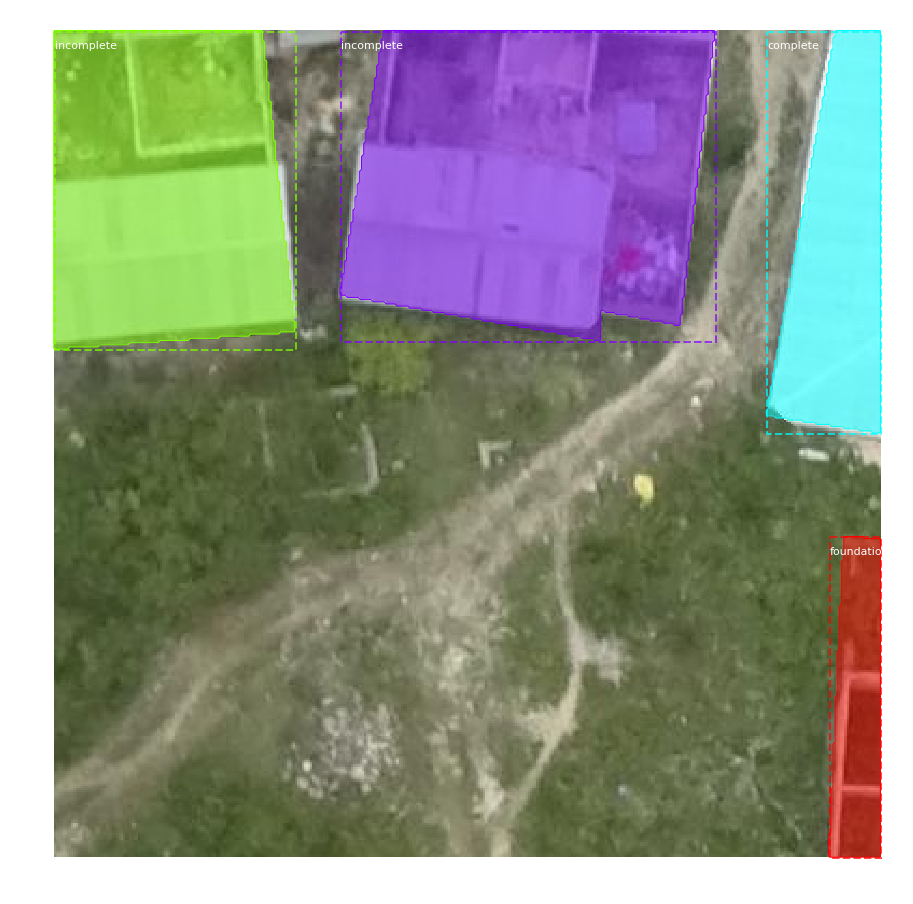

In [184]:
from mrcnn import visualize
from mrcnn.visualize import display_images
visualize.display_instances(image, gt_bbox, gt_mask, gt_class_id, train_bd.class_names,
                            show_bbox=True)

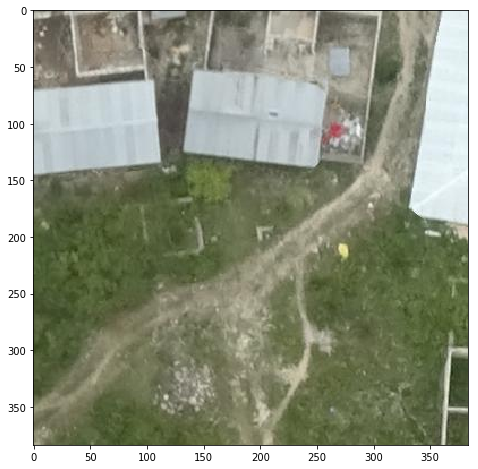

In [225]:
plt.figure(figsize=(8, 8))
plt.imshow(image)

In [227]:
from PIL import Image

In [230]:
Image.fromarray(image).save("/home/rde/Documents/events/2018/pyparis/geospatial_data_pipeline/tanzania_example_image.png")

In [185]:
mask, class_ids = train_bd.load_mask(i)

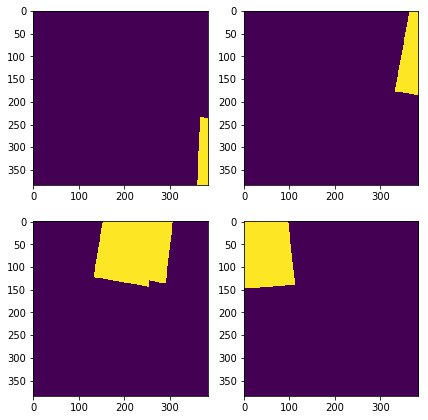

In [186]:
f, ax = plt.subplots(2, 2, figsize=(6, 6))
for i in range(class_ids.shape[0]):
    ax[int(i/2)][int(i%2)].imshow(mask[:, :, i])
f.tight_layout()

In [187]:
mask.shape

(384, 384, 4)

In [188]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 0, 1], dtype=np.bool)
a[:,b]

array([[1, 3],
       [4, 6]])

In [204]:
semseg_mask = np.zeros((mask.shape[0], mask.shape[1], config.NUM_CLASSES-1), dtype=np.bool)

In [205]:
semseg_mask.shape

(384, 384, 3)

In [206]:
for index, c in enumerate(class_ids-1):
    m = mask[:, :, index]
    semseg_mask[:, :, c] = semseg_mask[:, :, c] + m

In [207]:
np.sum(mask, axis=(0,1))

array([ 3047,  6835, 20961, 15078])

In [208]:
semseg_mask = semseg_mask.reshape([mask.shape[0], mask.shape[1], config.NUM_CLASSES-1])

In [209]:
np.sum(semseg_mask, axis=(0,1))

array([ 6835, 36039,  3047])

In [210]:
semseg_mask.shape

(384, 384, 3)

IndexError: index 3 is out of bounds for axis 2 with size 3

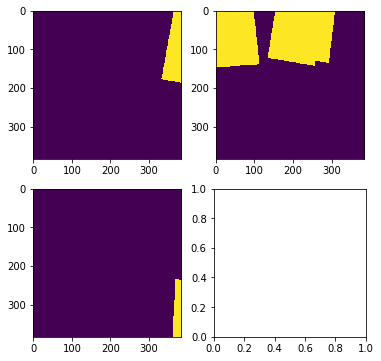

In [212]:
f, ax = plt.subplots(2, 2, figsize=(6, 6))
for i in range(class_ids.shape[0]):
    ax[int(i/2)][int(i%2)].imshow(semseg_mask[:, :, i])
f.tight_layout()

### Detect molded images

In [22]:
model_dir = "../data/open_ai_tanzania/output/instance_segmentation/checkpoints/"

In [23]:
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=model_dir)

In [24]:
weights_path = model.find_last()

In [25]:
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  ../data/open_ai_tanzania/output/instance_segmentation/checkpoints/buildings20181018T1542/mask_rcnn_buildings_0060.h5
Re-starting from epoch 60


In [26]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax

### Validation dataset

In [28]:
i = np.random.randint(len(val_bd.image_info)) ; i

246

In [29]:
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(val_bd, config, i, use_mini_mask=False)


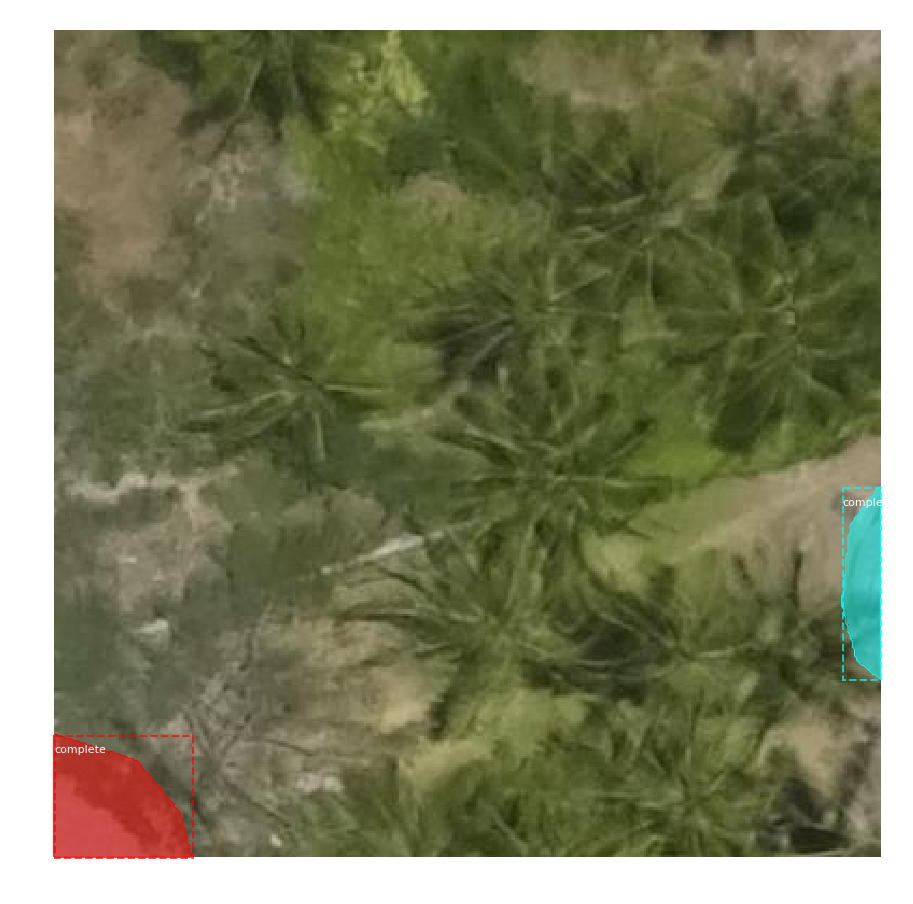

In [30]:
visualize.display_instances(image, gt_bbox, gt_mask, gt_class_id, val_bd.class_names,
                            show_bbox=True)

gt_class_id              shape: (2,)                  min:    1.00000  max:    1.00000  uint8
gt_bbox                  shape: (2, 4)                min:    0.00000  max:  384.00000  int32
gt_mask                  shape: (384, 384, 2)         min:    0.00000  max:    1.00000  int8
AP @0.50:	 0.500
AP @0.55:	 0.500
AP @0.60:	 0.000
AP @0.65:	 0.000
AP @0.70:	 0.000
AP @0.75:	 0.000
AP @0.80:	 0.000
AP @0.85:	 0.000
AP @0.90:	 0.000
AP @0.95:	 0.000
AP @0.50-0.95:	 0.100


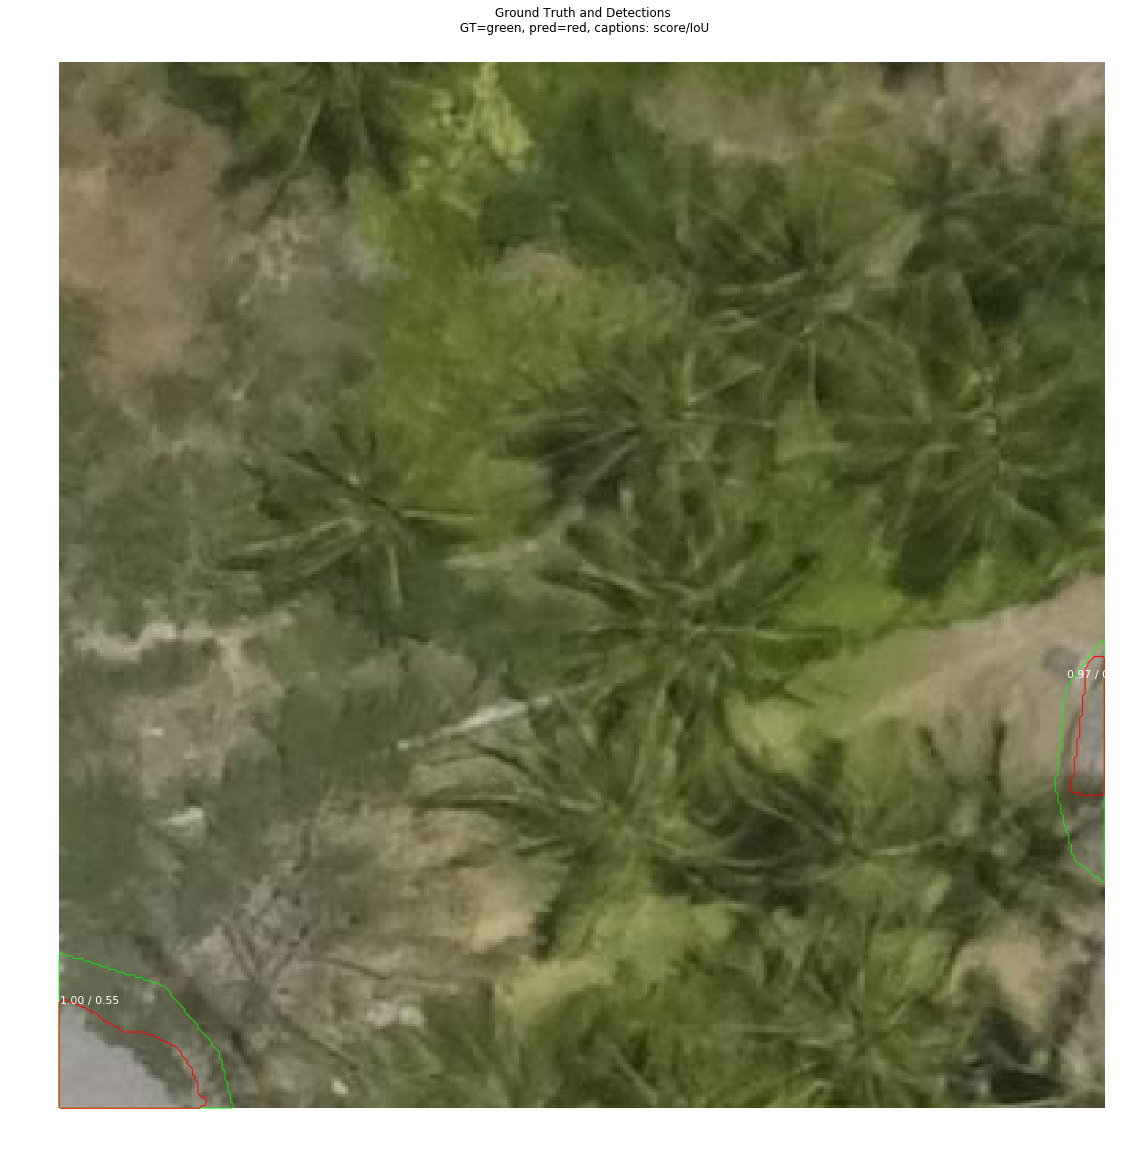

In [31]:
# Run object detection
#results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)
results = model.detect(np.expand_dims(image, 0))

# Display results
r = results[0]
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)

visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    val_bd.class_names, ax=get_ax(),
    show_box=False, show_mask=False,
    iou_threshold=0.5, score_threshold=0.5)

In [32]:
print(r["class_ids"])
print(r["scores"])
print(r["masks"].shape)
print(r["rois"])

[1 1]
[0.99687284 0.9663822 ]
(384, 384, 2)
[[337   0 384  57]
 [217 370 269 384]]


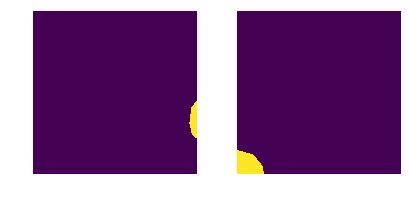

In [33]:
visualize.display_images(np.moveaxis(gt_mask, 2, 0))

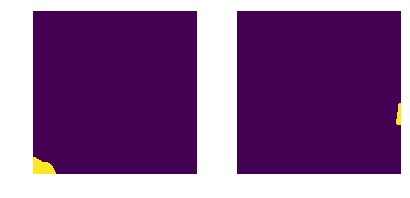

In [34]:
visualize.display_images(np.moveaxis(r["masks"], 2, 0))

In [274]:
with open("../data/open_ai_tanzania/preprocessed/384/validation/predicted_labels/test.json", "w") as fobj:
    json.dump({"masks": np.moveaxis(r["masks"], 2, 0).tolist(), "class_ids": r["class_ids"].tolist(), "scores": r["scores"].tolist()}, fobj)

### Test prediction format

In [35]:
images = np.expand_dims(image, 0)
image_metas = np.expand_dims(image_meta, 0)
anchors = model.get_anchors(images[0].shape)
anchors = np.broadcast_to(anchors, (model.config.BATCH_SIZE,) + anchors.shape)
detections, a, b, mrcnn_mask, c, d, e = model.keras_model.predict([images, image_metas, anchors], verbose=0)

In [36]:
detections.shape

(1, 100, 6)

In [37]:
results = []
for i, image in enumerate(images):
    window = [0, 0, image.shape[0], image.shape[1]]
    final_rois, final_class_ids, final_scores, final_masks =\
    model.unmold_detections(detections[i], mrcnn_mask[i], image.shape, image.shape, window)
    results.append({"rois": final_rois,
                   "class_ids": final_class_ids,
                   "scores": final_scores,
                   "masks": final_masks})

In [38]:
e[0,0]

array([ 3.4234138,  2.895475 , 23.352251 , 32.866096 ], dtype=float32)

In [272]:
detections[:10]

array([[[8.8749826e-04, 4.0047494e-01, 1.5793048e-01, 9.1173387e-01,
         2.0000000e+00, 9.2042661e-01],
        [1.4340132e-03, 3.9295098e-01, 1.5690945e-01, 9.2843699e-01,
         1.0000000e+00, 8.8547838e-01],
        [2.4346922e-01, 4.6408141e-01, 6.7712700e-01, 9.5993578e-01,
         1.0000000e+00, 8.3384812e-01],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e

### Testing dataset

In [39]:
test_bd = buildings.BuildingDataset()
test_bd.load_buildings(DATAPATH, subset="testing", img_size=config.IMAGE_MIN_DIM)

In [40]:
test_bd.prepare()

In [41]:
len(test_bd.image_info)

60343

In [65]:
i = np.random.randint(len(test_bd.image_info))
test_bd.image_info[i]

56077

In [67]:
image = test_bd.load_image(i)

In [68]:
# Run object detection
#results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)
results = model.detect(np.expand_dims(image, 0))
r = results[0]

In [69]:
r["rois"], r["class_ids"], r["scores"]

(array([[183,   0, 267,  14]], dtype=int32),
 array([3], dtype=int32),
 array([0.83926433], dtype=float32))

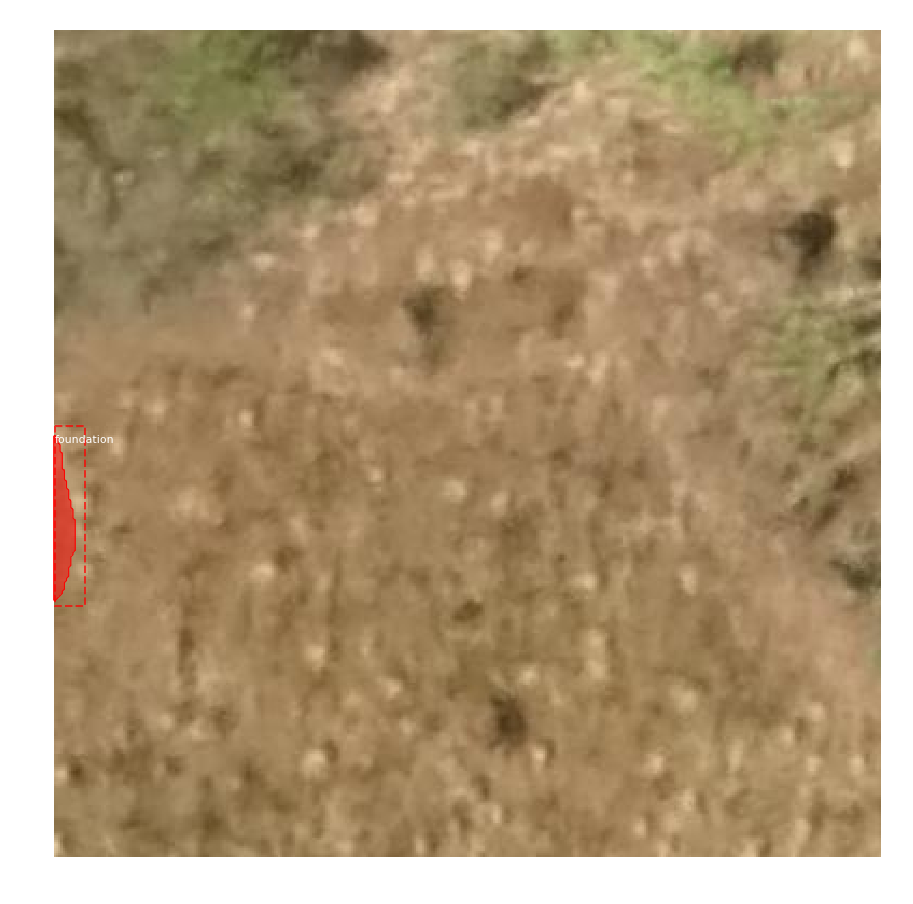

In [70]:
visualize.display_instances(image,
                            r["rois"],
                            r["masks"],
                            r["class_ids"],
                            ["", "complete", "incomplete", "foundation"],
                           show_mask=True)

In [59]:
with open("../data/open_ai_tanzania/preprocessed/384/testing/predicted_labels/5ae242fd0b093000130afd33_384_384_8832_39168.json", "w") as fobj:
    json.dump({"masks": np.moveaxis(r["masks"], 2, 0).tolist(), "class_ids": r["class_ids"].tolist(), "scores": r["scores"].tolist()}, fobj)